# Explore different color spaces: Hue/saturation, barycentric coordinates, spherical coordinates

In [1]:
import napari
from napari_brainbow_diagnose import fetch_chroms_data
from napari_brainbow_diagnose import DiagnoseWidget

In [2]:

bb = fetch_chroms_data()
viewer = napari.Viewer()

red_layer = viewer.add_image(bb[:,0], name="red", colormap='red', blending='additive')
green_layer = viewer.add_image(bb[:,1], name="green", colormap='green', blending='additive')
blue_layer = viewer.add_image(bb[:,2], name="blue", colormap='blue', blending='additive')

wdg = DiagnoseWidget(viewer)
viewer.window.add_dock_widget(wdg)

wdg.brainbow_layers_selector.red_layer.value = red_layer
wdg.brainbow_layers_selector.green_layer.value = green_layer
wdg.brainbow_layers_selector.blue_layer.value = blue_layer


Compute the density in the first default color space (default is HSV - Hue/Saturation/Value). And use the color space drop-down menu to select different color spaces.

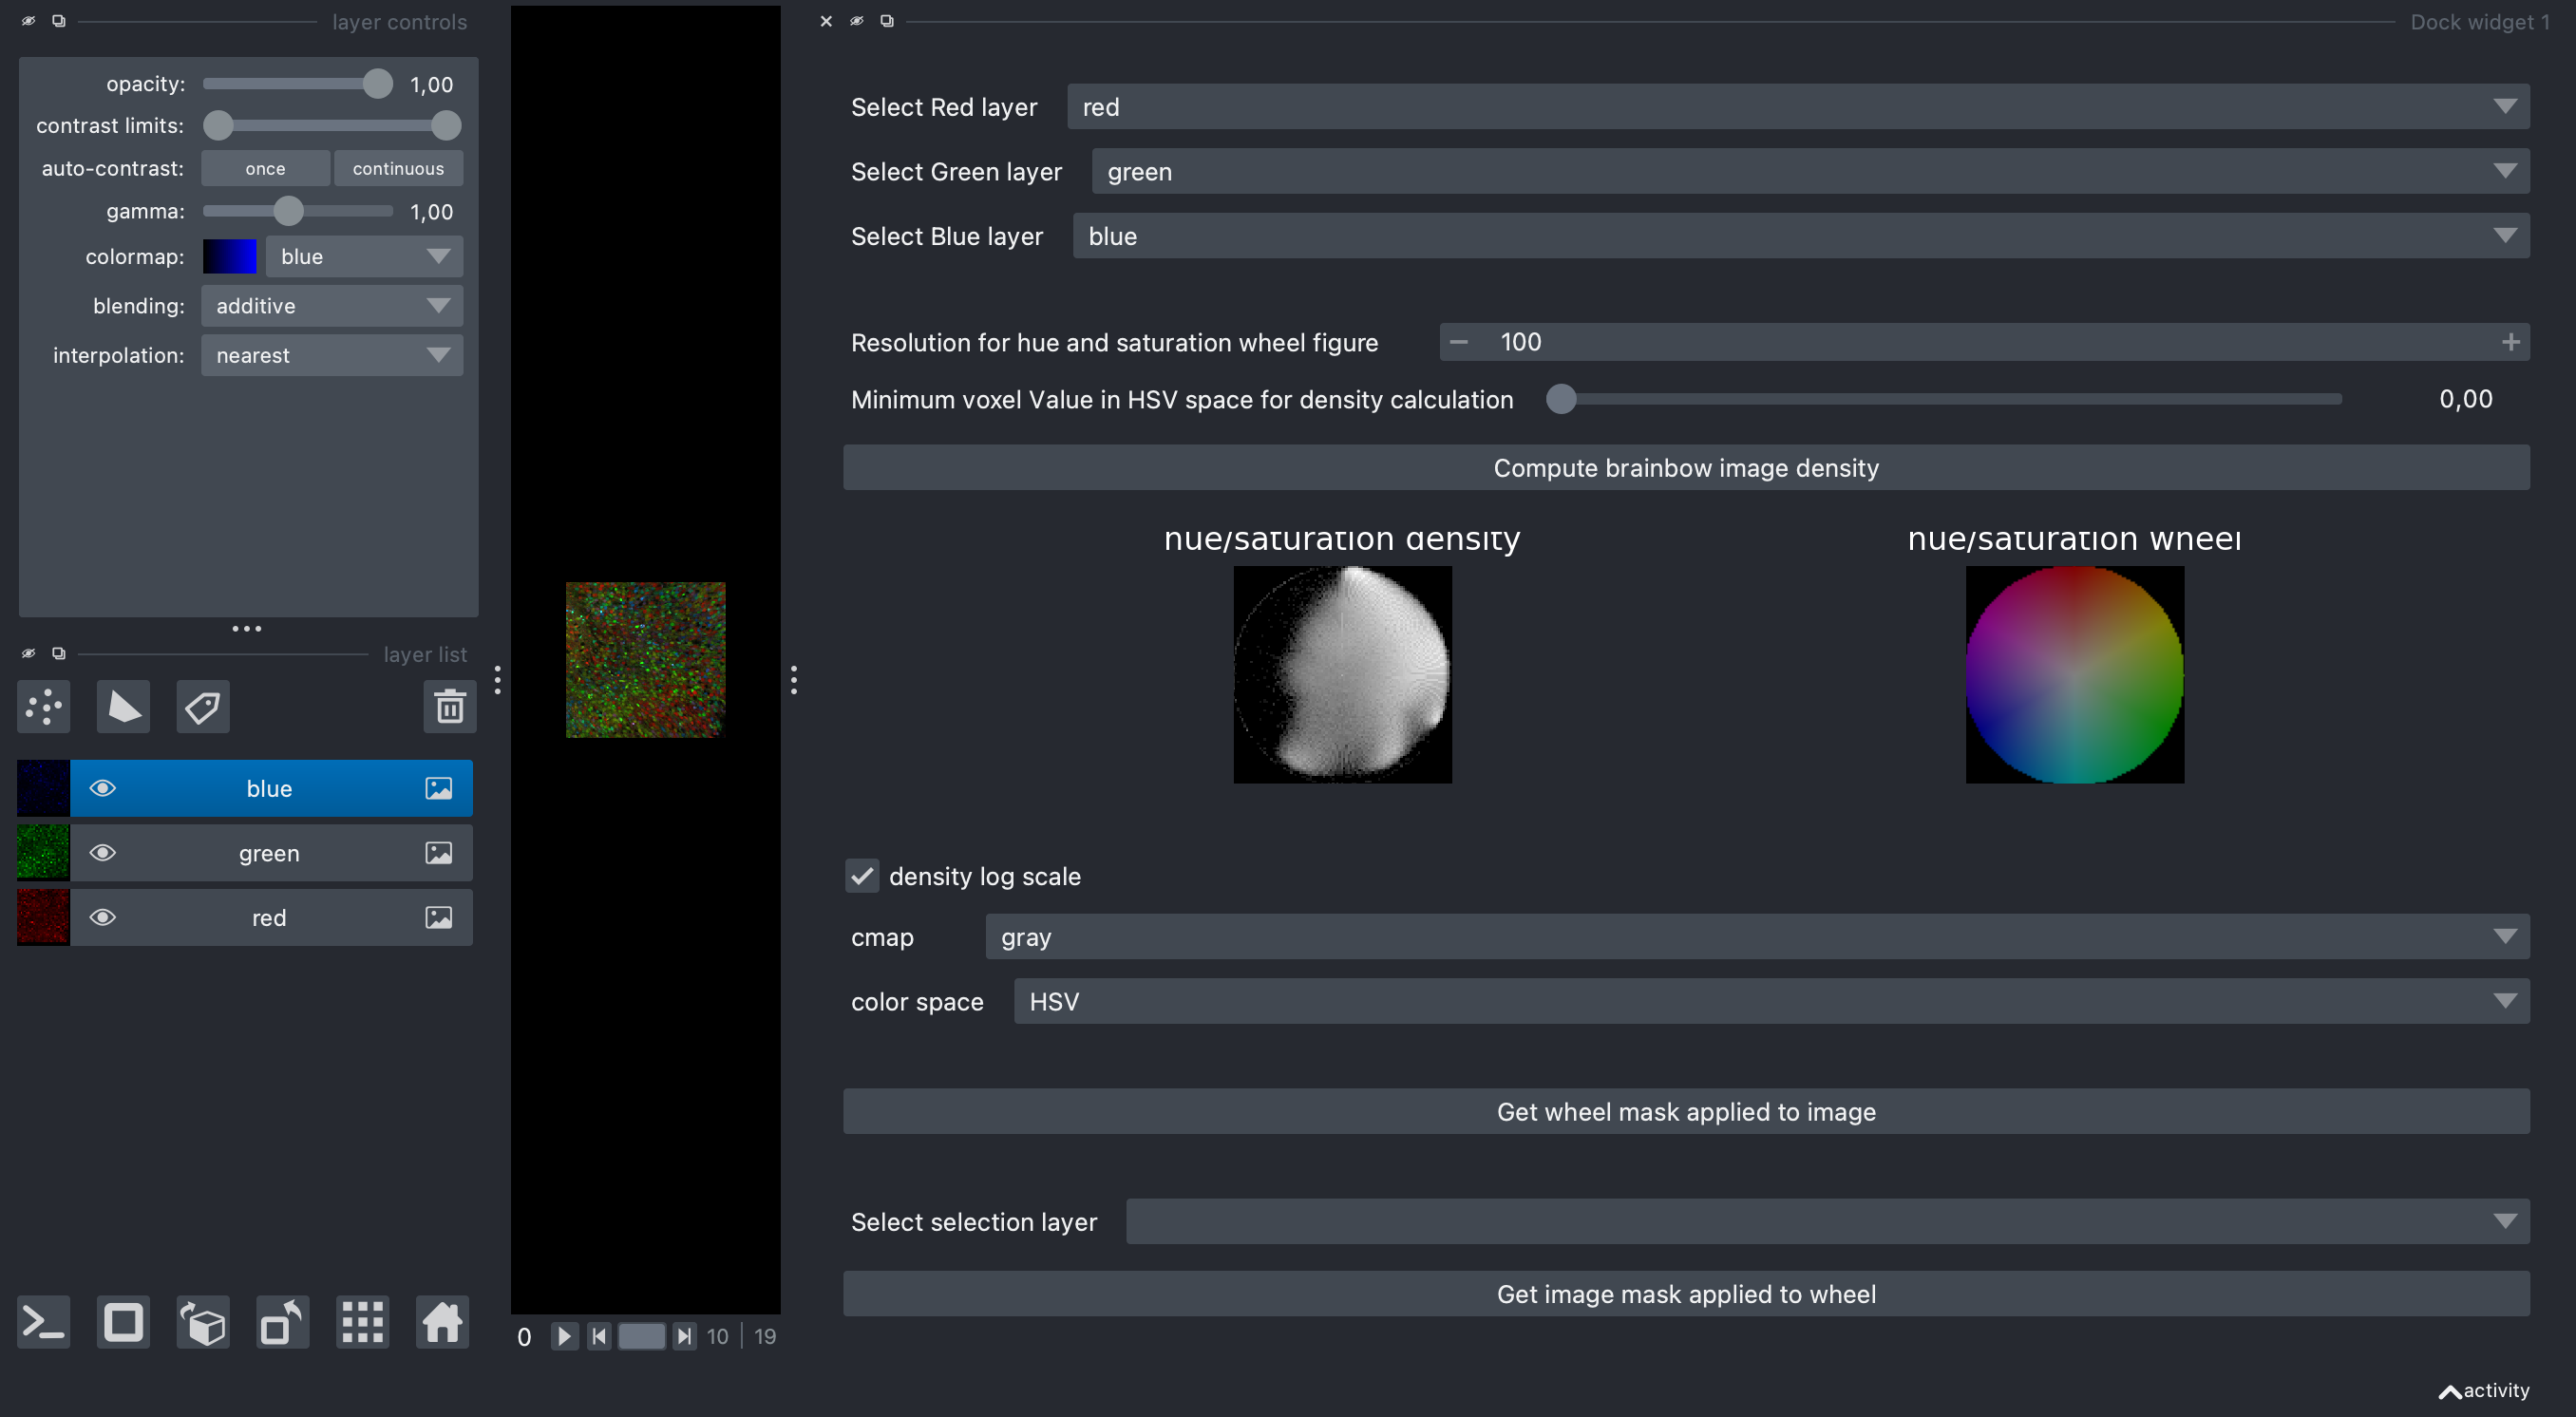

In [6]:
wdg.update_density_wheel()
napari.utils.nbscreenshot(viewer)

Issues: 
- changing color space takes time because of "display" purposes (i.e., it is not related to the computation of the densities). This happens for both the barycentric and spherical color spaces. However, reducing the resolution significantly reduces the time.
- cannot change the log-scale in the barycentric color space, because I could not link the selected scale directly into the ```ternary``` package used for barycentric plots
- drawing?

In [7]:
wdg.density_figure_parameters.color_space.value = "Barycentric"

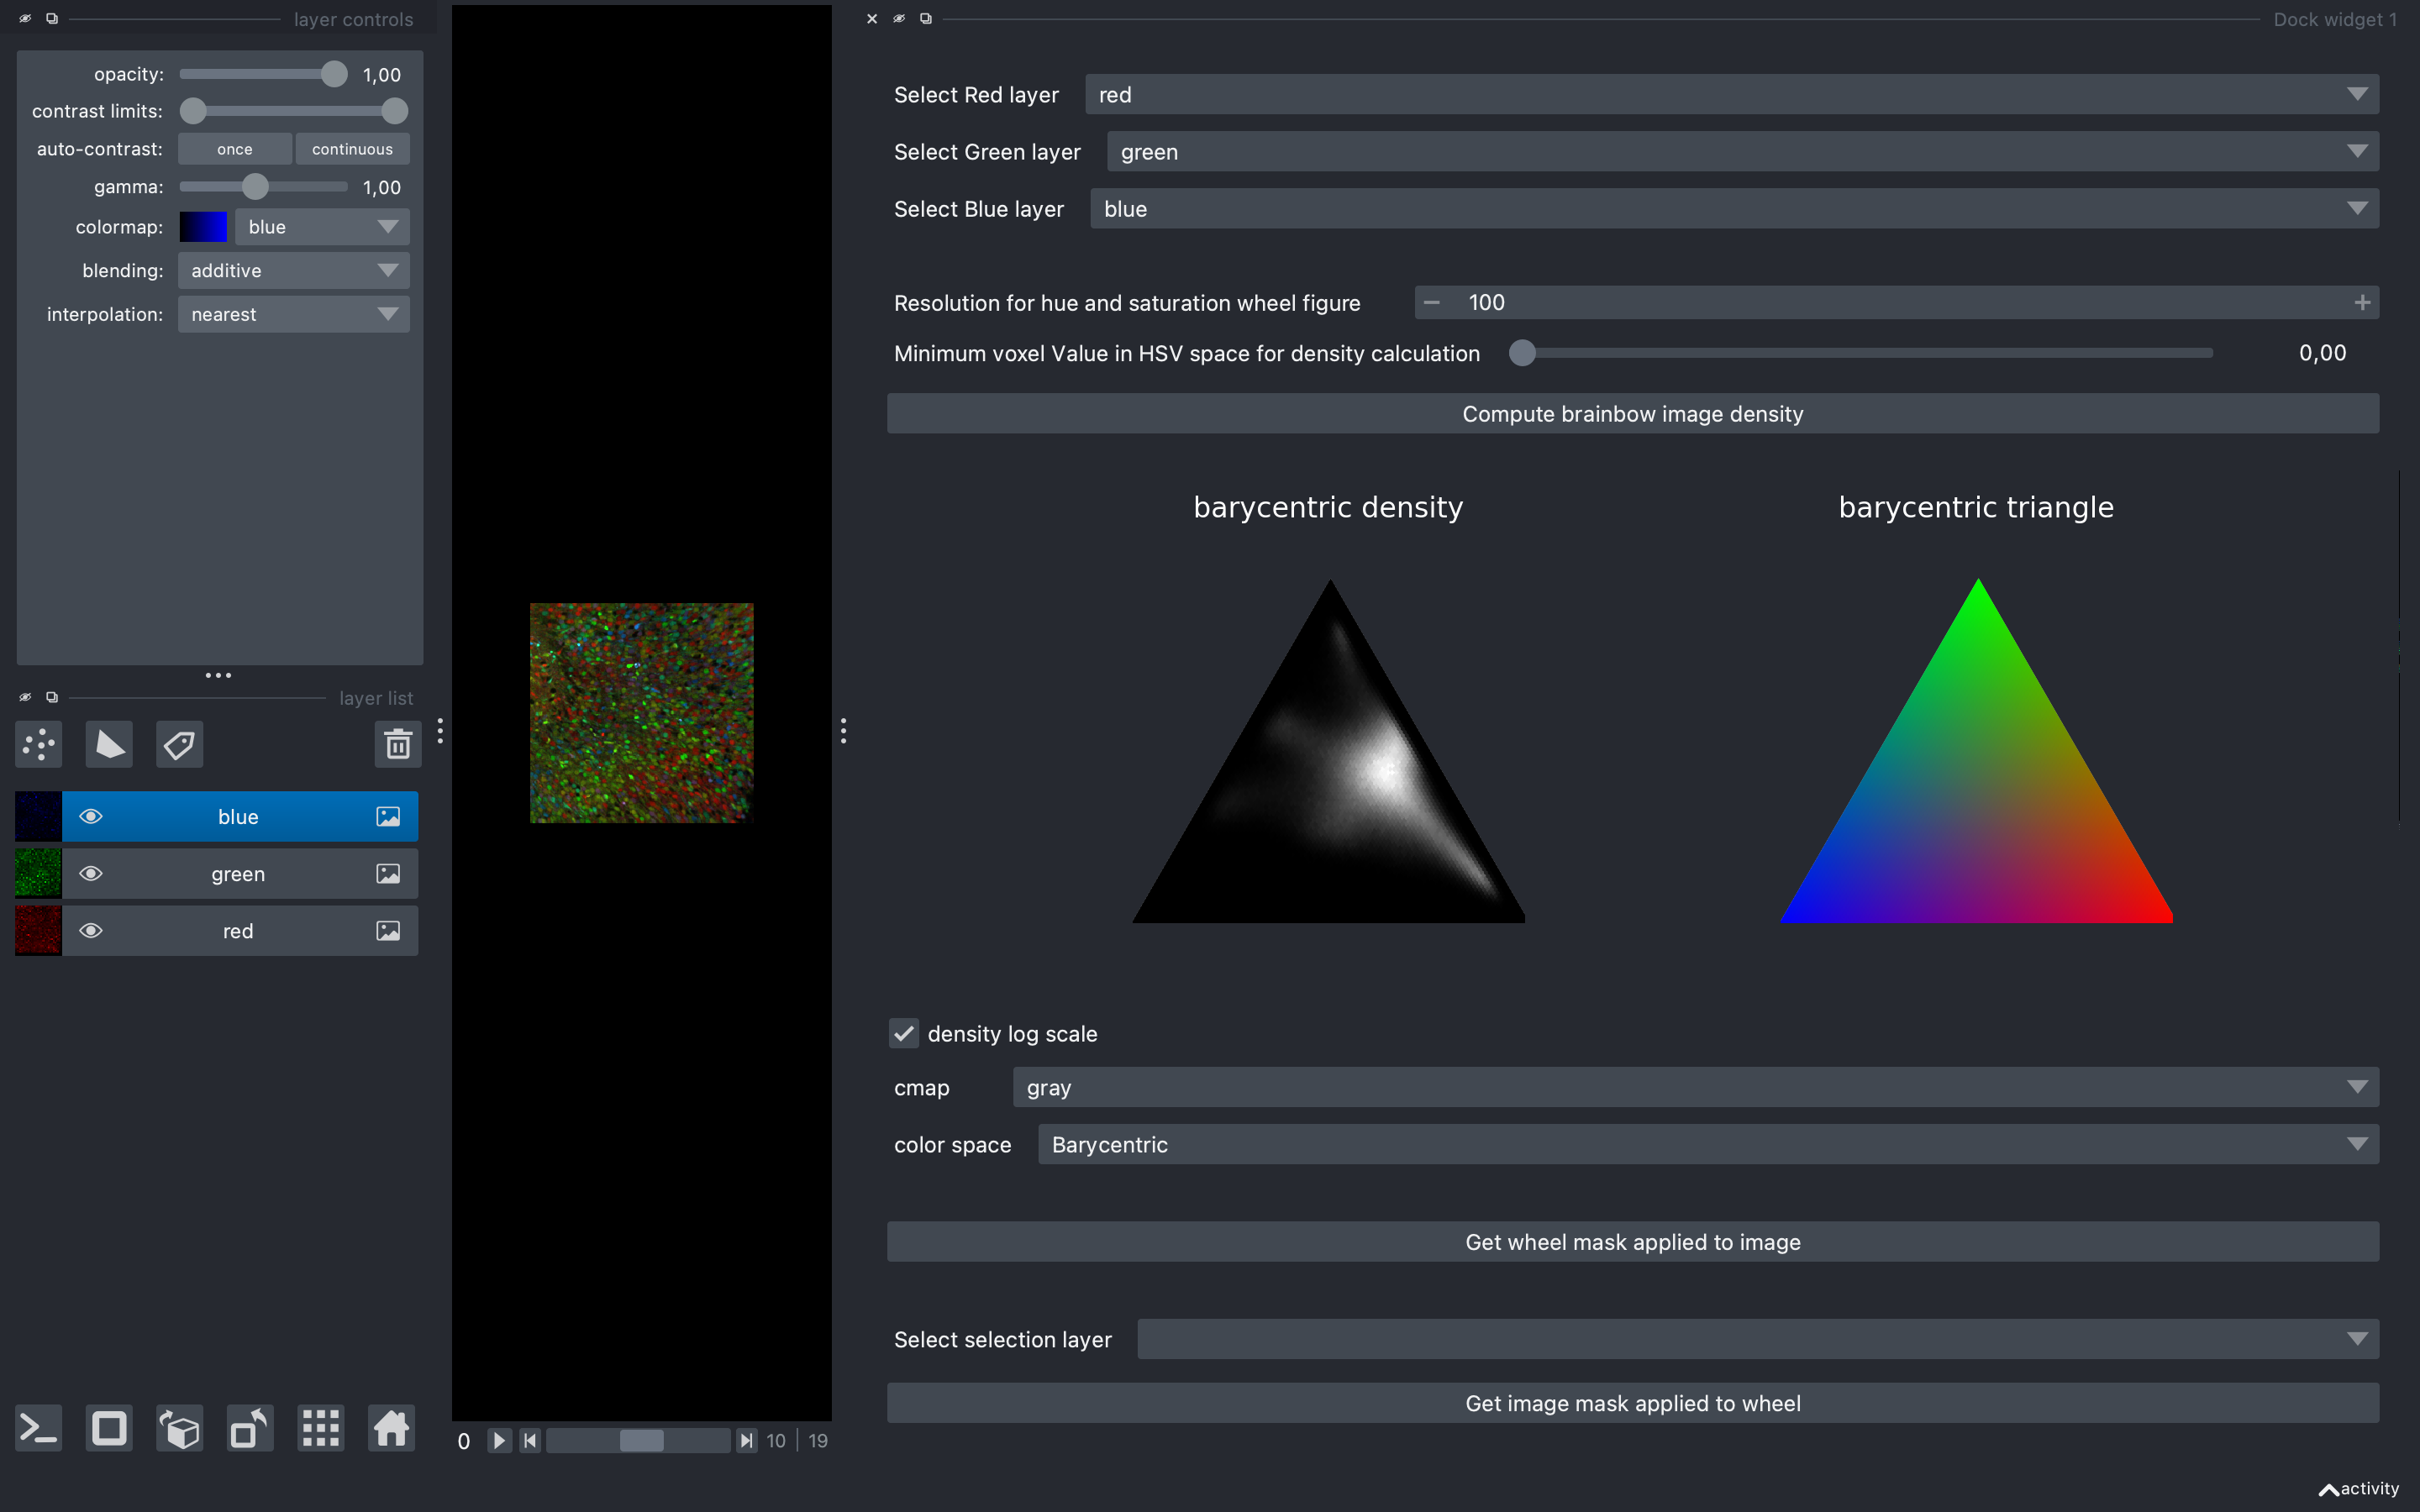

In [9]:
napari.utils.nbscreenshot(viewer)

/Users/alexandremisrahi/Desktop/BX_Y3/BIO/napari-brainbow-diagnose/src/napari_brainbow_diagnose/_density.py:177: RuntimeWarning: divide by zero encountered in scalar divide
  theta, phi = round(2*bins*(np.arctan(b/r))/np.pi), round(2*bins*(np.arctan(g/np.sqrt(r**2+b**2)))/np.pi)


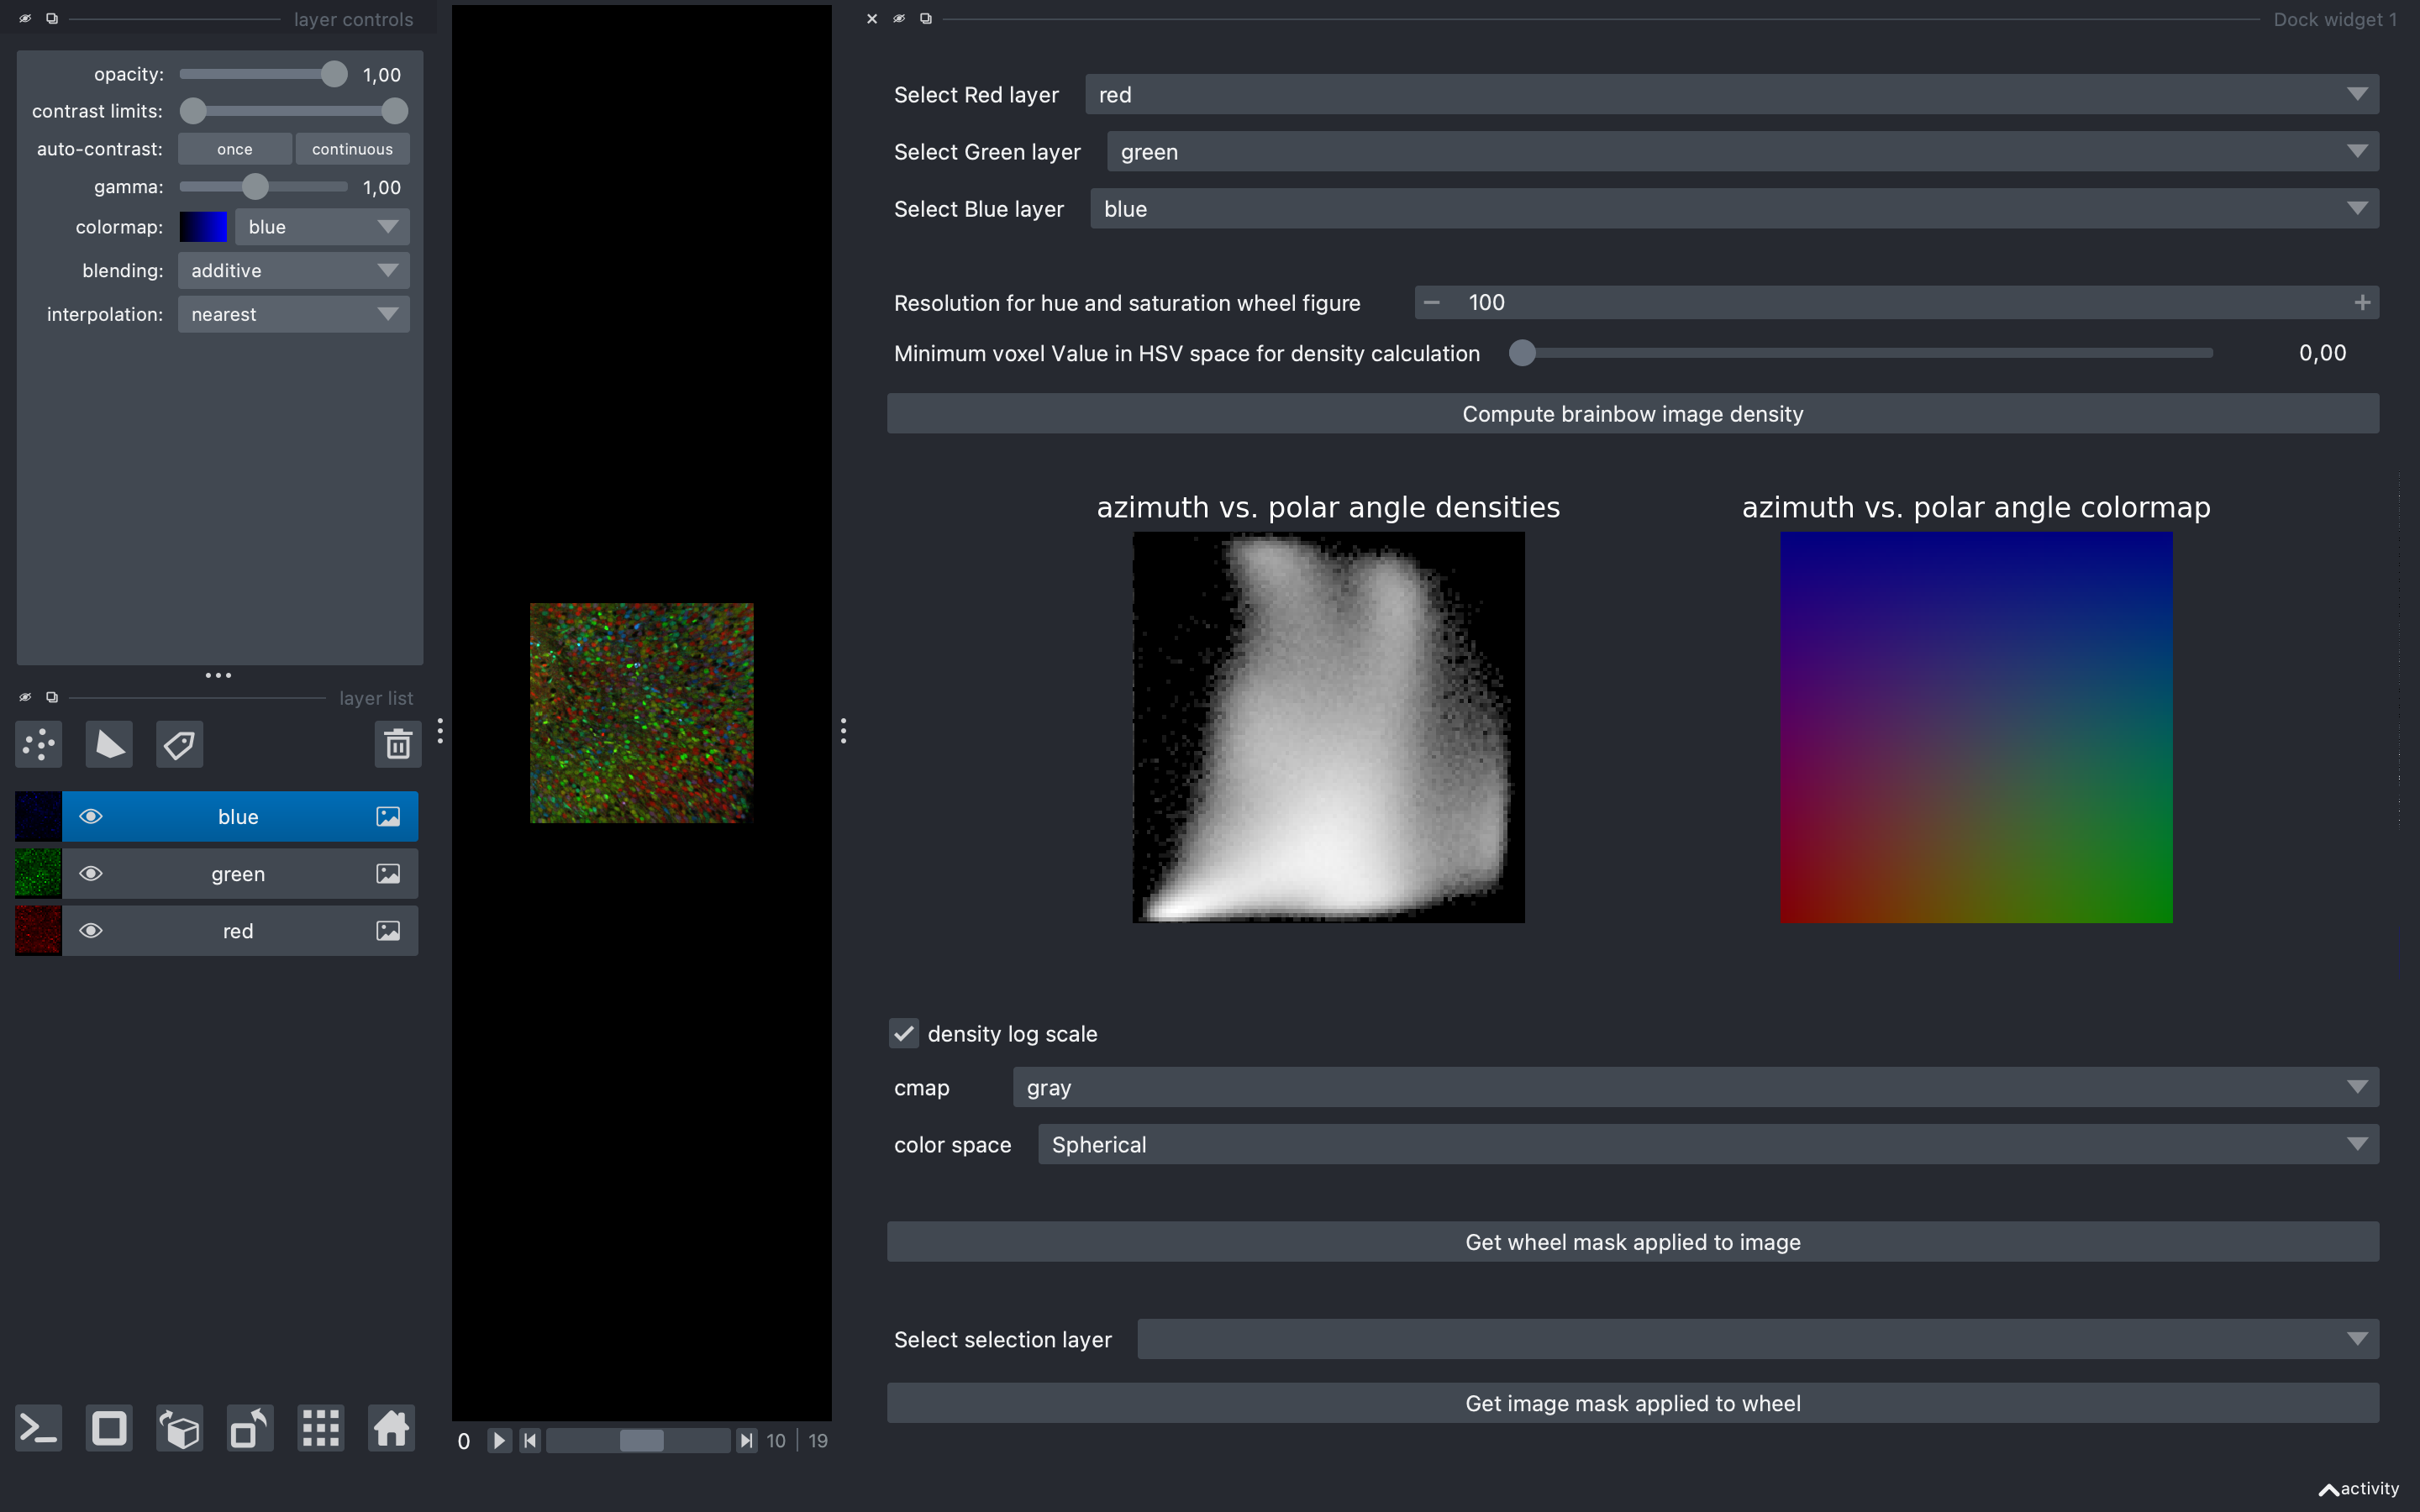

In [10]:
wdg.density_figure_parameters.color_space.value = "Spherical"
napari.utils.nbscreenshot(viewer)

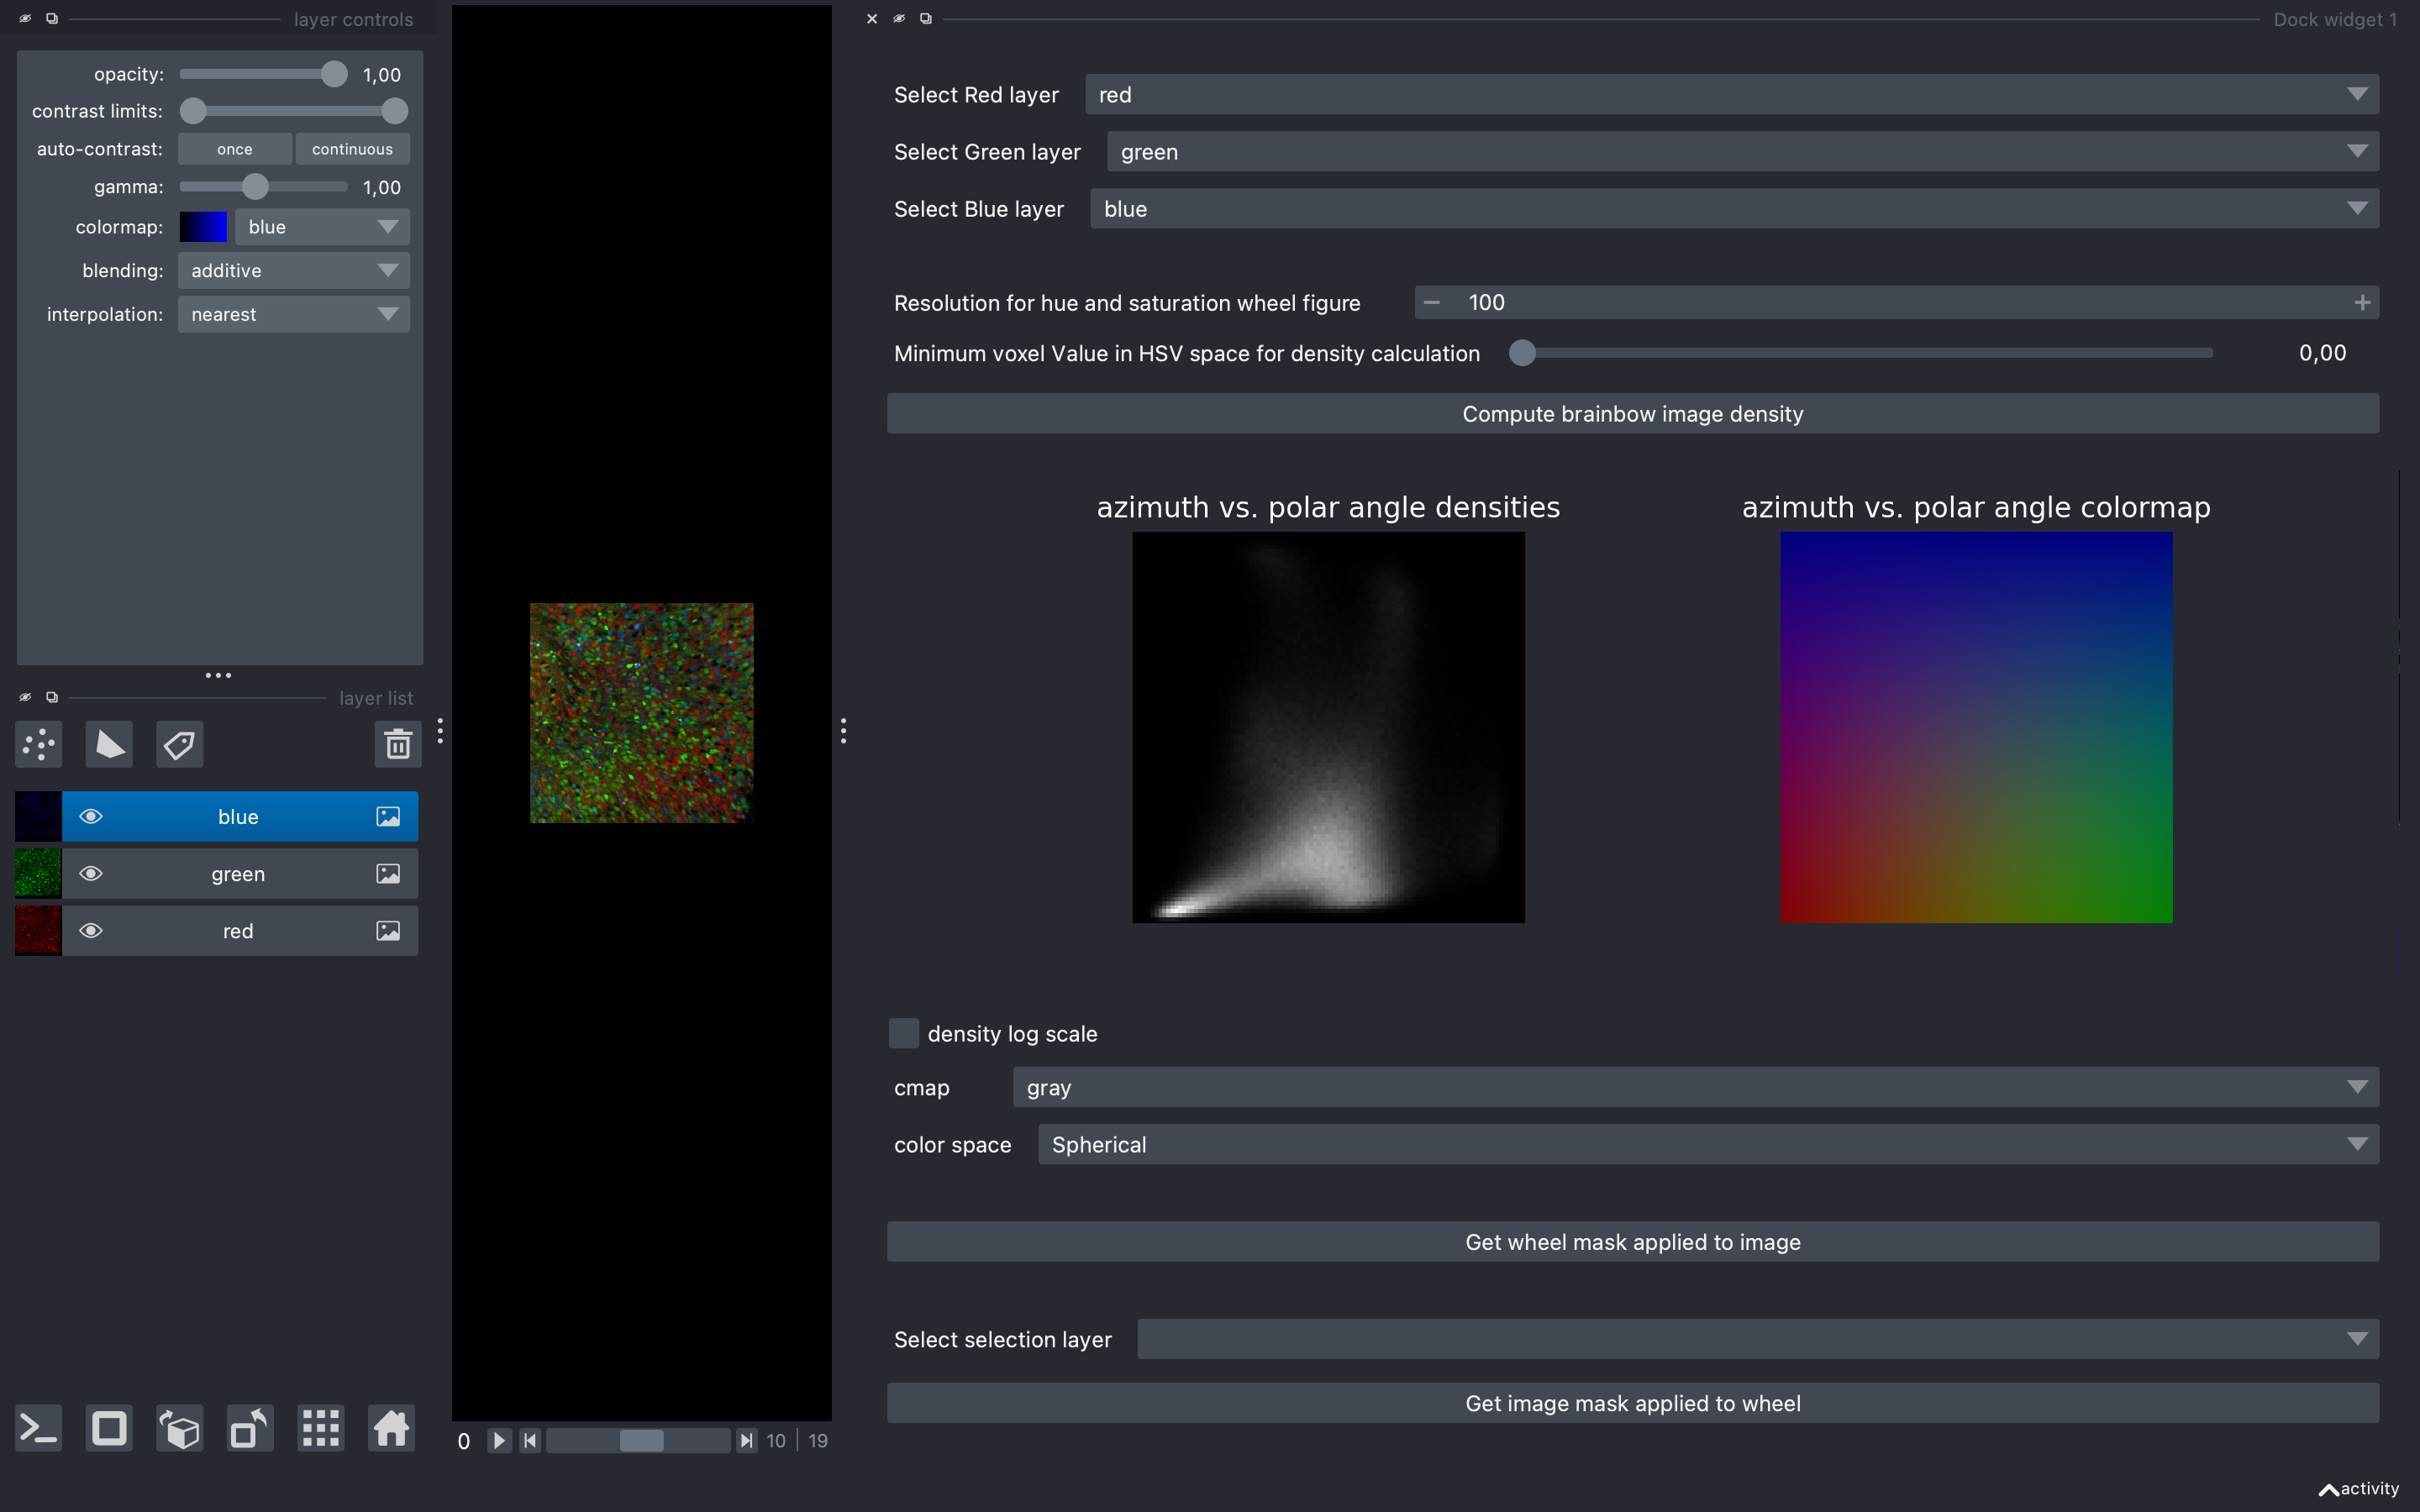

In [13]:
wdg.density_figure_parameters.density_log_scale.value = False
napari.utils.nbscreenshot(viewer)